In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import re
from scipy.optimize import curve_fit

In [3]:
def get_pos_volt(filepath):
    df = pd.read_csv("high_res_0.csv")
    col_name = df.columns[0]
    df.rename(columns = {col_name:'values'}, inplace = True)
    
    pat1 = r'X\((\d+.\d+)\smm\)\sE\((\d+.\d+)\sV\)'
    pat2 = r'X\((\d+)\smm\)\sE\((\d+.\d+)\sV\)'
    pat3 = r'X\((\d+)\smm\)\sE\((-\d+.\d+)\sV\)'
    pat4 = r'X\((\d+.\d+)\smm\)\sE\((-\d+.\d+)\sV\)'
    pat5 = r'X\((\d+.\d+)\smm\)\sE\((-\d+.\d+e-05)\sV\)'
    data1 = np.array(df["values"].str.findall(pat1))
    data2 = np.array(df["values"].str.findall(pat2))
    data3 = np.array(df["values"].str.findall(pat3))
    data4 = np.array(df["values"].str.findall(pat4))
    data5 = np.array(df["values"].str.findall(pat5))
    data = data1 + data2 + data3 + data4 + data5
    
    position, voltage = [], []
    for entry in data:
        if len(entry) != 0:
            #print(entry[0][0])
            position.append(float(entry[0][0]))
            voltage.append(float(entry[0][1]))
    return position, voltage
    
pos_0, volt_0 = get_pos_volt("high_res_0.csv")
pos_5, volt_5 = get_pos_volt("high_res_0.05.csv")
pos_n5, volt_n5 = get_pos_volt("high_res_-0.05.csv")

In [4]:
# pat1 = r'X\((\d+.\d+)\smm\)\sE\((\d+.\d+)\sV\)'
# pat2 = r'X\((\d+)\smm\)\sE\((\d+.\d+)\sV\)'
# pat3 = r'X\((\d+)\smm\)\sE\((-\d+.\d+)\sV\)'
# pat4 = r'X\((\d+.\d+)\smm\)\sE\((-\d+.\d+)\sV\)'
# pat5 = r'X\((\d+.\d+)\smm\)\sE\((-\d+.\d+e-05)\sV\)'
# data1 = np.array(df["values"].str.findall(pat1))
# data2 = np.array(df["values"].str.findall(pat2))
# data3 = np.array(df["values"].str.findall(pat3))
# data4 = np.array(df["values"].str.findall(pat4))
# data5 = np.array(df["values"].str.findall(pat5))
# data = data1 + data2 + data3 + data4 + data5
# data = data[:len(data)]

# for d in data:
#     if len(d) == 0:
#         print(d)
# print(data)

In [5]:
# string = 'X(2.5 mm) E(1130.42 V)'
# #pat = r'X\((\d+.\d+)\smm\)\sE\((\d+.\d+)\)'
# pat = r'X\((\d+.\d+)\smm\)\sE\((\d+.\d+)\sV\)'
# print(re.findall(pat, string)[0][0], re.findall(pat, string)[0][1])

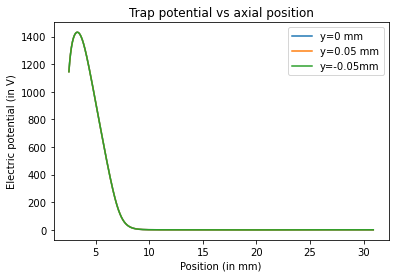

In [6]:
#plt.plot(position[500:2000], voltage[500:2000])
#plt.plot(position[700:2000], voltage[700:2000])
plt.plot(pos_0, volt_0, label='y=0 mm')
plt.plot(pos_5, volt_5, label='y=0.05 mm')
plt.plot(pos_n5, volt_n5, label='y=-0.05mm')
plt.legend()
plt.xlabel(f"Position (in mm)")
plt.ylabel("Electric potential (in V)")
plt.title("Trap potential vs axial position");
#print(len(position), len(voltage))

In [7]:
print(len(pos_0), len(volt_0))
print(max(pos_0), max(volt_0))
print(min(pos_0), min(volt_0))

2273 2273
30.9 1430.86
2.5125 -0.891346


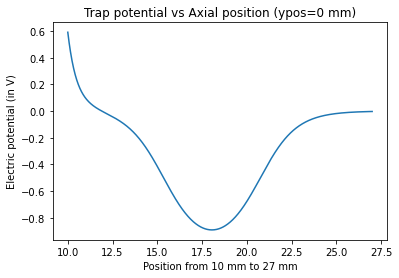

Min index: 599, Max index: 1959


In [30]:
def range_plot(min_mm, max_mm, position, voltage, ypos):
    position, voltage = np.array(position), np.array(voltage)
    min_diff, max_diff = np.abs(position - min_mm), np.abs(position - max_mm)
    min_index, max_index = np.argmin(min_diff), np.argmin(max_diff)
    plt.plot(position[min_index:max_index+1], voltage[min_index:max_index+1])
    plt.xlabel(f"Position from {min_mm} mm to {max_mm} mm")
    plt.ylabel("Electric potential (in V)")
    plt.title(f"Trap potential vs Axial position (ypos={ypos} mm)")
    plt.show()
    print(f"Min index: {min_index}, Max index: {max_index}")
    return position[min_index:max_index+1], voltage[min_index:max_index+1]

range_pos_0, range_volt_0 = range_plot(10, 27, pos_0, volt_0, 0)
# range_pos_5, range_voltage_5 = range_plot(10, 27, pos_5, volt_5, 0.05)
# range_pos_n5, range_voltage_n5 = range_plot(10, 27, pos_n5, volt_n5, -0.05)
# plt.plot(range_pos_0, range_voltage_0, label='y=0 mm')
# plt.plot(range_pos_5, range_voltage_5, label='y=0.05 mm')
# plt.plot(range_pos_n5, range_voltage_n5, label='y=-0.05mm')
# plt.legend()
# plt.xlabel(f"Position (in mm)")
# plt.ylabel("Electric potential (in V)")
# plt.title("Trap potential vs axial position");

In [9]:
def minima_position(position, voltage):
    position, voltage = np.array(position), np.array(voltage)
    min_index = np.argmin(voltage)
    print(f"Minimum voltage of {voltage[min_index]} at {position[min_index]} mm")
    return min_index

minima_index = minima_position(pos_0, volt_0)
minima_index

Minimum voltage of -0.891346 at 18.05 mm


1243

In [10]:
def quartic(x, p_0, p_1, p_2, p_3, p_4, x_0):
    return p_0 + p_1*(x-x_0) + p_2*(x-x_0)**2 + p_3*(x-x_0)**3 + p_4*(x-x_0)**4

def quartic_wo_x_0(x, p_0, p_1, p_2, p_3, p_4):
    x_0 = 18.05 #
    return p_0 + p_1*(x-x_0) + p_2*(x-x_0)**2 + p_3*(x-x_0)**3 + p_4*(x-x_0)**4

popt, pcov = curve_fit(quartic_wo_x_0, range_pos_0, range_volt_0)
print(f"p_0 = {np.abs(popt[0])}, p_1 = {np.abs(popt[1])}, p_2 = {np.abs(popt[2])}, p_3 = {np.abs(popt[3])}, p_4 = {np.abs(popt[4])}")

p_0 = 0.7941498147445512, p_1 = 0.0036167958136596816, p_2 = 0.034019853163593086, p_3 = 0.0002605339525980805, p_4 = 0.000305254261127162


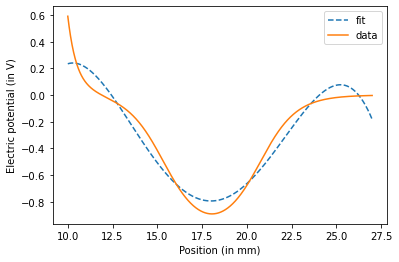

In [11]:
y_data = quartic_wo_x_0(range_pos_0, popt[0], popt[1], popt[2], popt[3], popt[4])
plt.plot(range_pos_0, y_data, ls='--', label='fit')
plt.plot(range_pos_0, range_volt_0, label='data')
plt.xlabel(f"Position (in mm)")
plt.ylabel("Electric potential (in V)")
plt.legend();

## Finding best range for fit

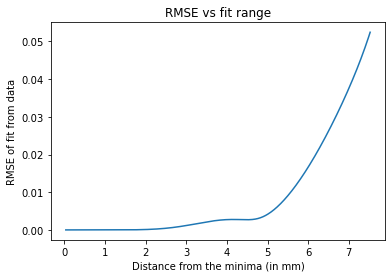

In [36]:
def rmse(data, fit):
    data, fit = np.array(data), np.array(fit)
    return np.sqrt(np.mean(np.square(data - fit)))

def best_range_plot(min_idx, idx_range, position, voltage):
    error, dist_from_min = [], []
    ranges = range(0, idx_range, 1)
    for r in ranges:
        x, y = np.array(position[min_idx-(r+3):min_idx+(r+3)]), np.array(voltage[min_idx-(r+3):min_idx+(r+3)])
        popt, pcov = curve_fit(quartic_wo_x_0, x, y)
        fit = quartic_wo_x_0(x, popt[0], popt[1], popt[2], popt[3], popt[4])
        # plt.plot(range_pos_0, y_data, ls='--', label='fit')
        # plt.plot(range_pos_0, range_volt_0, label='data')
        # plt.xlabel(f"Position (in mm)")
        # plt.ylabel("Electric potential (in V)")
        # plt.legend();
        error.append(rmse(y, fit))
        dist_from_min.append(position[min_idx] - position[min_idx-(r+3)])
    plt.plot(dist_from_min, error)
    plt.xlabel("Distance from the minima (in mm)")
    plt.ylabel("RMSE of fit from data")
    plt.title("RMSE vs fit range")
    
best_range_plot(1243, 600, pos_0, volt_0)
        

p_0 = 0.8936116245240974, p_1 = 0.0001158021948073801, p_2 = 0.0621847608993875, p_3 = 4.8249908112519974e-05, p_4 = 0.0012310197686058579


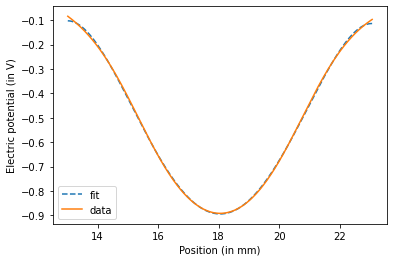

In [34]:
r=400
min_idx=1243
x, y = np.array(pos_0[min_idx-(r+3):min_idx+(r+3)]), np.array(volt_0[min_idx-(r+3):min_idx+(r+3)])
popt, pcov = curve_fit(quartic_wo_x_0, x, y)
fit = quartic_wo_x_0(x, popt[0], popt[1], popt[2], popt[3], popt[4])
plt.plot(x, fit, ls='--', label='fit')
plt.plot(x, y, label='data')
plt.xlabel(f"Position (in mm)")
plt.ylabel("Electric potential (in V)")
plt.legend();
print(f"p_0 = {np.abs(popt[0])}, p_1 = {np.abs(popt[1])}, p_2 = {np.abs(popt[2])}, p_3 = {np.abs(popt[3])}, p_4 = {np.abs(popt[4])}")